In [3]:
# Import necessary libraries
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
# use API key to access Quandl data
quandl.ApiConfig.api_key = "xi_GqGzd8iysF3zVunHu"

# Get data from various stocks for specific dates
aapl = quandl.get("EOD/AAPL", start_date="2014-01-01", end_date="2017-12-28")
msft = quandl.get("EOD/MSFT", start_date="2014-01-01", end_date="2017-12-28")

In [5]:
# Isolate Adjusted close values
aapl = aapl[['Adj_Close']]
msft = msft[['Adj_Close']]

# Change value depending on stock being looked at
stock = msft

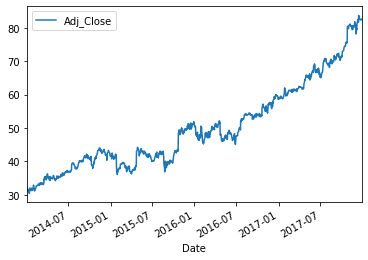

In [6]:
# Plot the Adjusted Close value of the selected stock
stock.plot()

In [7]:
# Add a prediction column to the data that uses the next day's value
stock["Prediction"] = stock[["Adj_Close"]].shift(-1)
stock.tail()

Adj_Close  Prediction
Date                             
2017-12-21  82.442398   82.452041
2017-12-22  82.452041   82.345975
2017-12-26  82.345975   82.644889
2017-12-27  82.644889   82.654531
2017-12-28  82.654531         NaN

In [8]:
# Create variable x and drop prediction column
X = np.array(stock.drop(["Prediction"],1))

# Remove the last row contaning NaN values
X = X[:-1]
print(X)

[[32.33361894]
 [32.11608921]
 [31.43739646]
 ...
 [82.45204087]
 [82.34597463]
 [82.64488858]]


In [9]:
# Create y variable
y = np.array(stock["Prediction"])

# Remove the last row contaning NaN values
y = y[:-1]
print(y)

[32.11608921 31.43739646 31.68102975 ... 82.34597463 82.64488858
 82.65453097]


In [10]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [11]:
# Create and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Calculate score using test data
lr_confidence = lr.score(X_test, y_test)
print("Score: ", lr_confidence)

# Assign predicted values to a variable for analysis
lr_pred_values = lr.predict(X_test)

# Calculate and print MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_values))  
# Calculate and print MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_values))  
# Calculate and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_values)))


Score:  0.9965095415935665
Mean Absolute Error: 0.4714960519327396
Mean Squared Error: 0.5192870556165696
Root Mean Squared Error: 0.72061574754967


In [13]:
# Display actual and predicted values side by side for comparison
lr_comparison = pd.DataFrame({"Actual":y_test.flatten(), "Predicted": lr_pred_values.flatten()})
print(lr_comparison)

        Actual  Predicted
0    32.098687  32.027963
1    71.320510  70.500953
2    41.743272  41.653535
3    39.278471  40.077019
4    40.802136  41.457618
..         ...        ...
397  65.772948  65.593905
398  35.363242  35.549544
399  55.305430  55.071844
400  54.180955  54.190091
401  41.814324  41.404593

[402 rows x 2 columns]


In [14]:
# Create and train SVM model
svm = SVR(kernel="rbf", C=1e3, gamma=0.1)
svm.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
# Calculate and print score for Support Vector Machine model
svm_confidence = svm.score(X_test, y_test)
print(svm_confidence)

# Assign predicted values to a variable for analysis
svm_pred = svm.predict(X_test)

# Calculate and print MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_pred))  

# Calculate and print MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm_pred))  

# Calculate and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))

0.9964765377793873
Mean Absolute Error: 0.4750218990385426
Mean Squared Error: 0.5241971423426162
Root Mean Squared Error: 0.7240146009181142


In [16]:
# Display actual and predicted values side by side for comparison
svm_comparison = pd.DataFrame({"Actual":y_test.flatten(), "Predicted": svm_pred.flatten()})
print(svm_comparison)

        Actual  Predicted
0    32.098687  32.069785
1    71.320510  70.550051
2    41.743272  41.623137
3    39.278471  40.089622
4    40.802136  41.433149
..         ...        ...
397  65.772948  65.780444
398  35.363242  35.453419
399  55.305430  54.867076
400  54.180955  54.097034
401  41.814324  41.381664

[402 rows x 2 columns]


In [17]:
# Create and train Decision Tree model
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
# Calculate and print score for Decision Tree model
dtree_confidence = dtree.score(X_test, y_test)
print(dtree_confidence)

# Assign predicted values to a variable for analysis
dtree_pred = dtree.predict(X_test)

# Calculate and print MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtree_pred))  

# Calculate and print MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtree_pred))  

# Calculate and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))

0.99112854678493
Mean Absolute Error: 0.874384987213324
Mean Squared Error: 1.3198354722126582
Root Mean Squared Error: 1.1488409255474223


In [21]:
# Display actual and predicted values side by side for comparison
dtree_comparison = pd.DataFrame({"Actual":y_test.flatten(), "Predicted": dtree_pred.flatten()})
print(dtree_comparison)

        Actual  Predicted
0    32.098687  32.427140
1    71.320510  70.215239
2    41.743272  42.242858
3    39.278471  39.732373
4    40.802136  42.242858
..         ...        ...
397  65.772948  65.395365
398  35.363242  36.564385
399  55.305430  56.588749
400  54.180955  53.851312
401  41.814324  42.242858

[402 rows x 2 columns]


In [22]:
import pickle
pickle.dump(lr, open('models/lin_reg.pickle', 'wb'))